In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
hotels = pd.read_excel('../data/HotelCustomersDataset.xlsx')

In [18]:
hotels['date'] = (pd.to_datetime('2018-12-31') - pd.to_timedelta(hotels['DaysSinceCreation'], unit = 'D')).astype('datetime64[ns]')

# Assignment 1

In [17]:
daily_revenue = (hotels
                 .groupby('date')
                 .agg(
                    LodgingRevenue = pd.NamedAgg('LodgingRevenue', 'sum'),
                    OtherRevenue = pd.NamedAgg('OtherRevenue', 'sum')
                 )
                 )
monthly_revenue = daily_revenue.resample('M').sum()

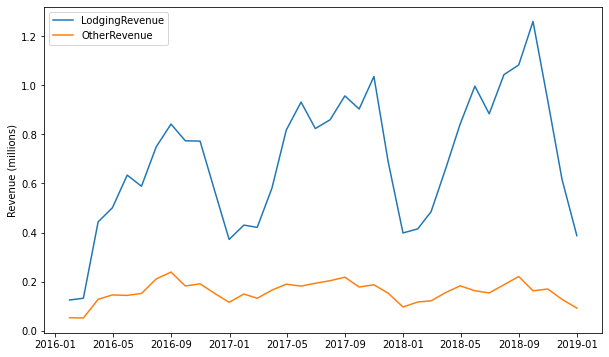

In [21]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_ylabel('Revenue (millions)')


ax.legend(monthly_revenue.columns)

plt.show()

# Assignment  2

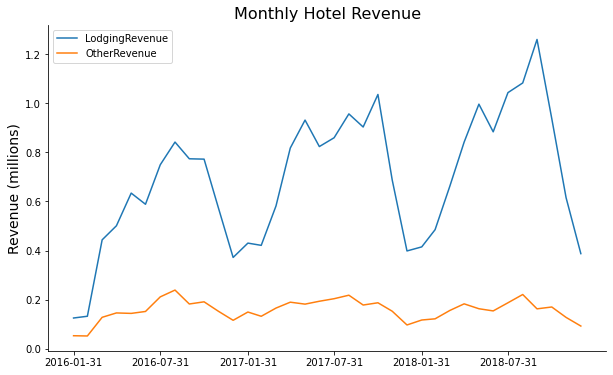

In [25]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_title('Monthly Hotel Revenue', fontsize = 16)
ax.set_ylabel('Revenue (millions)', fontsize = 14)

ax.set_xticks(monthly_revenue.index[::6])

ax.legend(monthly_revenue.columns)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# Assignment 3

In [27]:
room_nights = (hotels
               .groupby('date')
               .agg(
                    RoomNights = pd.NamedAgg('RoomNights', 'sum'),
                    BookingsCanceled = pd.NamedAgg("BookingsCanceled", 'sum')
               )
               )

quarterly_bookings = room_nights.resample("Q").sum()

In [28]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


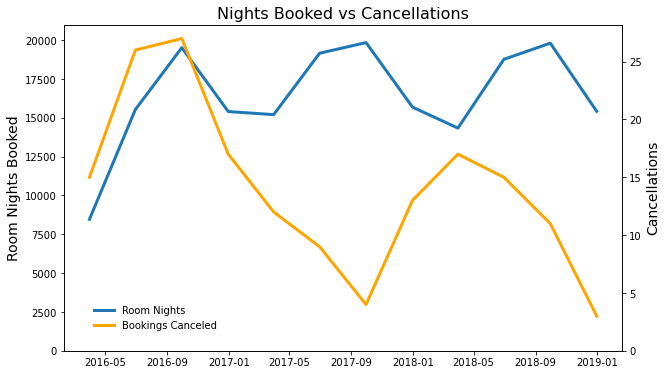

In [36]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(
    quarterly_bookings.index,
    quarterly_bookings['RoomNights'],
    label = 'Room Nights',
    linewidth = 3
)

ax.set_title('Nights Booked vs Cancellations', fontsize = 16)
ax.set_ylabel('Room Nights Booked', fontsize = 14)
ax.set_ylim(0, 21000)

ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index,
    quarterly_bookings['BookingsCanceled'],
    label = 'Bookings Canceled',
    color = 'orange',
    linewidth = 3
)

ax2.set_ylabel('Cancellations', fontsize = 14)
ax2.set_ylim(0)

fig.legend(bbox_to_anchor = (.35, .25), frameon = False)

plt.show()

## Assignment bar chart

In [6]:
countries = (
    hotels
    .groupby('Nationality')
    .agg(
        RoomNights = pd.NamedAgg('RoomNights', 'sum'),
        LodgingRevenue = pd.NamedAgg('LodgingRevenue', 'sum')
    )
    .sort_values('RoomNights', ascending=False)
    .iloc[:10]
)

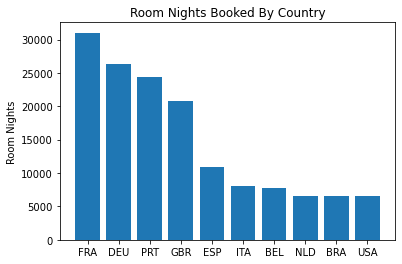

In [7]:
fig, ax = plt.subplots()

ax.bar(countries.index, countries['RoomNights'])

ax.set_title('Room Nights Booked By Country')
ax.set_ylabel('Room Nights')

plt.show()

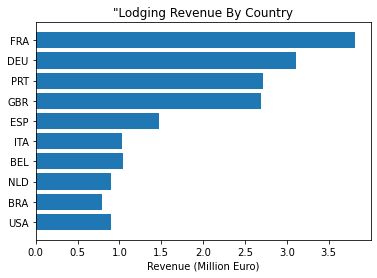

In [10]:
fig, ax = plt.subplots()

ax.barh(
    countries.index[::-1],
    countries['LodgingRevenue'].iloc[::-1] / 1_000_000
)

ax.set_title('"Lodging Revenue By Country')
ax.set_xlabel('Revenue (Million Euro)')

plt.show()

# Advanced bar charts

In [8]:
import numpy as np

In [7]:
countries = ['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

countries_subset = (
    hotels
    .loc[hotels['Nationality'].isin(countries)]
    .groupby('Nationality')
    .agg({'LodgingRevenue':'sum', 'OtherRevenue':'sum'})
    .sort_values('LodgingRevenue', ascending = False)
)

countries_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


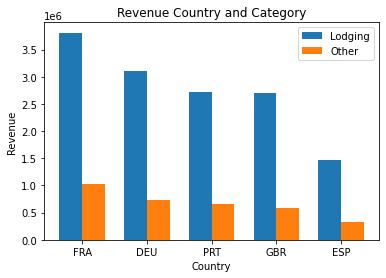

In [9]:
fig, ax = plt.subplots()

x = np.arange(0, len(countries))
width = 0.35

ax.bar(x - width/2, countries_subset['LodgingRevenue'], width, label = 'Lodging')
ax.bar(x + width/2, countries_subset['OtherRevenue'], width, label = 'Other')

ax.set_title('Revenue Country and Category')
ax.set_ylabel('Revenue')
ax.set_xlabel('Country')

ax.legend()

plt.xticks(range(len(countries)), countries)

plt.show()

In [8]:
countries_subset_pcts = countries_subset.apply(lambda x: x * 100 / sum(x), axis = 1)

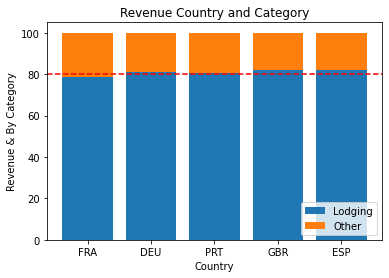

In [12]:
fig, ax = plt.subplots()

ax.bar(
    countries,
    countries_subset_pcts['LodgingRevenue'],
    label = 'Lodging'
)

ax.bar(
    countries,
    countries_subset_pcts['OtherRevenue'],
    label = 'Other',
    bottom = countries_subset_pcts['LodgingRevenue']
)

ax.axhline(80, 0, 1, c = 'red', ls = '--')

ax.set_title('Revenue Country and Category')
ax.set_ylabel('Revenue & By Category')
ax.set_xlabel('Country')

ax.legend(loc = 'lower right')

plt.show()

# Assignment pie charts

In [5]:
country_rev = (
    hotels
    .groupby('Nationality')
    .agg({'LodgingRevenue':'sum'})
    .sort_values('LodgingRevenue', ascending=False)
)

country_rev

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
...,...
PNG,0.00
FJI,0.00
NRU,0.00


In [9]:
countries_subset_pcts

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


In [12]:
pie_data = (
    pd.concat([country_rev.iloc[:5],
              pd.DataFrame({'LodgingRevenue': country_rev.iloc[5:, 0].sum()}, index=['OTH'])])
).iloc[::-1]

In [13]:
pie_data

,LodgingRevenue
OTH,11170126.66
ESP,1475909.33
GBR,2693123.61
PRT,2715008.72
DEU,3113382.55
FRA,3809315.59


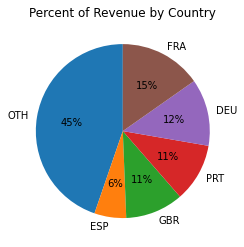

In [15]:
fig, ax = plt.subplots()

ax.pie(pie_data['LodgingRevenue'],
       startangle=90,
       labels=pie_data.index,
       autopct='%.0f%%')

ax.set_title('Percent of Revenue by Country')

plt.show()

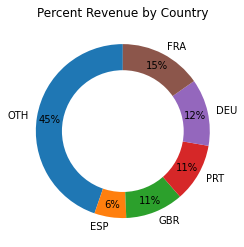

In [16]:
fig, ax = plt.subplots()

ax.pie(pie_data['LodgingRevenue'],
       startangle=90,
       labels=pie_data.index,
       autopct='%.0f%%',
       pctdistance=.85)

hole = plt.Circle((0,0), 0.7, fc = 'white')
fig = plt.gcf()

fig.gca().add_artist(hole)

ax.set_title('Percent Revenue by Country')

plt.show()

# Assignment: Scatter plots and Histograms

In [19]:
hotels_plot = (
    hotels
    .assign(
        total_revenue = hotels['LodgingRevenue'] + hotels['OtherRevenue'],
        revenue_per_night = lambda dff: dff['total_revenue'] / dff['RoomNights']
    )
)

In [21]:
agg_hotels = (
    hotels_plot
    .groupby('Nationality')
    .apply(
        lambda dff: pd.Series(
            dict(
                total_revenue = dff['total_revenue'].sum(),
                avg_revenue = dff['total_revenue'].mean(),
                avg_age = dff['Age'].mean(),
                avg_nights = dff['RoomNights'].mean(),
                avg_nightly_revenue = dff['revenue_per_night'].mean()
            )
        )
    )
)

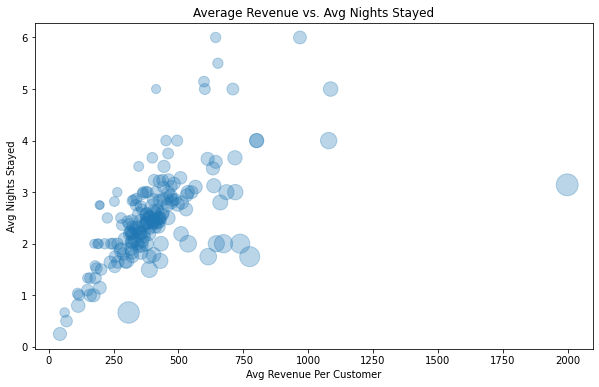

In [30]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(
    agg_hotels['avg_revenue'],
    agg_hotels['avg_nights'],
    s = agg_hotels['avg_nightly_revenue'],
    alpha = 0.3
)

ax.set_title('Average Revenue vs. Avg Nights Stayed')
ax.set_ylabel('Avg Nights Stayed')
ax.set_xlabel('Avg Revenue Per Customer')

plt.show()

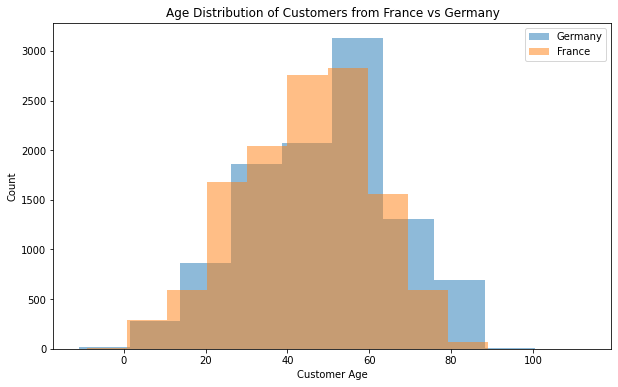

In [32]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.hist(
    hotels.loc[hotels['Nationality'] == 'DEU', 'Age'], 
    alpha = .5
)

ax.hist(
    hotels.loc[hotels['Nationality'] == 'FRA', 'Age'], 
    alpha = .5
)

ax.set_title('Age Distribution of Customers from France vs Germany')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Count')

ax.legend(['Germany', 'France'])

plt.show()

# Assignment subplots

In [36]:
hotels

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018-12-31
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,0,0,0,1,0,0,0,0,0,2018-12-31
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018-12-31
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,0,0,0,0,1,0,0,0,0,2018-12-31


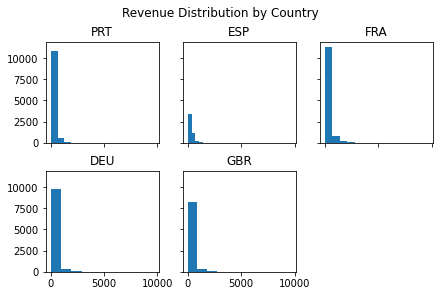

In [37]:
fig, ax = plt.subplots(2, 3, constrained_layout = True, sharex = 'all', sharey = 'all')

fig.suptitle('Revenue Distribution by Country')

ax[0][0].hist(
    hotels.query('Nationality == "PRT" and RoomNights < 15').loc[:, 'LodgingRevenue']
)
ax[0][0].set_title('PRT')

ax[0][1].hist(
    hotels.query('Nationality == "ESP" and RoomNights < 15').loc[:, 'LodgingRevenue']
)
ax[0][1].set_title('ESP')

ax[0][2].hist(
    hotels.query('Nationality == "FRA" and RoomNights < 15').loc[:, 'LodgingRevenue']
)
ax[0][2].set_title('FRA')

ax[1][0].hist(
    hotels.query('Nationality == "DEU" and RoomNights < 15').loc[:, 'LodgingRevenue']
)
ax[1][0].set_title('DEU')

ax[1][1].hist(
    hotels.query('Nationality == "GBR" and RoomNights < 15').loc[:, 'LodgingRevenue']
)
ax[1][1].set_title('GBR')

ax[1, 2].set_axis_off()

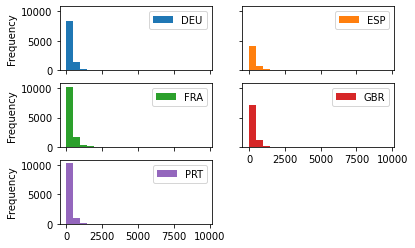

In [39]:
country_list = ['PRT', 'FRA', 'DEU', 'ESP', 'GBR']

hotels_pivot = (
    hotels
    .query("Nationality in @country_list and RoomNights < 15")
    .pivot_table(
        index = 'ID',
        columns = 'Nationality',
        values = 'LodgingRevenue'
    )
)

hotels_pivot.plot.hist(subplots=True,
                       bins = 20,
                       layout = (3, 2),
                       sharex = True,
                       sharey = True)

plt.show()

# Assignment: grid spec

In [43]:
hotels_gs = (
    hotels
    .assign(
        date = pd.to_datetime('2018-12-31') - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D'),
        total_revenue = hotels['LodgingRevenue'] + hotels['OtherRevenue']
    )
)

monthly_revenue_gs = (
    hotels_gs
    .groupby('date')
    .agg(LodgingRevenue = ('LodgingRevenue', sum),
         OtherRevenue = ('OtherRevenue', sum),
         total_revenue = ('total_revenue', sum)
         )
    .resample('M')
    .sum()
)

In [46]:
monthly_revenue_gs.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [47]:
rev_by_country = (
    hotels_gs
    .groupby('Nationality')
    .agg(total_revenue = ('total_revenue', sum))
    .sort_values('total_revenue', ascending=False)
    .iloc[:5]
)

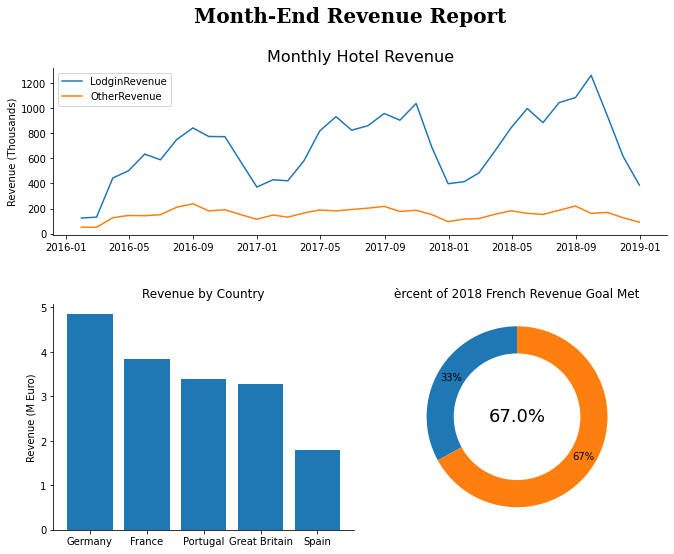

In [52]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(11, 8.5))

gs = GridSpec(nrows=8, ncols = 8)

fig.suptitle('Month-End Revenue Report',
             fontsize = 20,
             fontweight = 'bold',
             fontfamily = 'serif')

ax1 = fig.add_subplot(gs[0:3, :])

ax1.plot(
    monthly_revenue_gs.index,
    monthly_revenue_gs['LodgingRevenue'] / 1000,
    label = 'LodginRevenue'
)

ax1.plot(
    monthly_revenue_gs.index,
    monthly_revenue_gs['OtherRevenue'] / 1000,
    label = 'OtherRevenue'
)

ax1.set_title('Monthly Hotel Revenue', fontsize = 16)
ax1.set_ylabel('Revenue (Thousands)')

ax1.legend(loc = 'upper left')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar chart
ax2 = fig.add_subplot(gs[4:, :4])

ax2.bar(
    x = rev_by_country.index,
    height = rev_by_country['total_revenue'] / 1000_000,
)

ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany', 'France', 'Portugal', 'Great Britain', 'Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Pie Chart

ax3 = fig.add_subplot(gs[4:, 4:])
pie_list = [.33, .67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    autopct='%.0f%%',
    pctdistance=.85
)

hole = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()

# Add circle in Pie chart
fig.gca().add_artist(hole)
plt.text(
    0, 0,
    f'{pie_list[1] * 100}%',
    ha = 'center',
    va = 'center',
    fontsize = 18
)

ax3.set_title('Percent of 2018 French Revenue Goal Met', fontsize = 12)

plt.show()

# Assignment colors

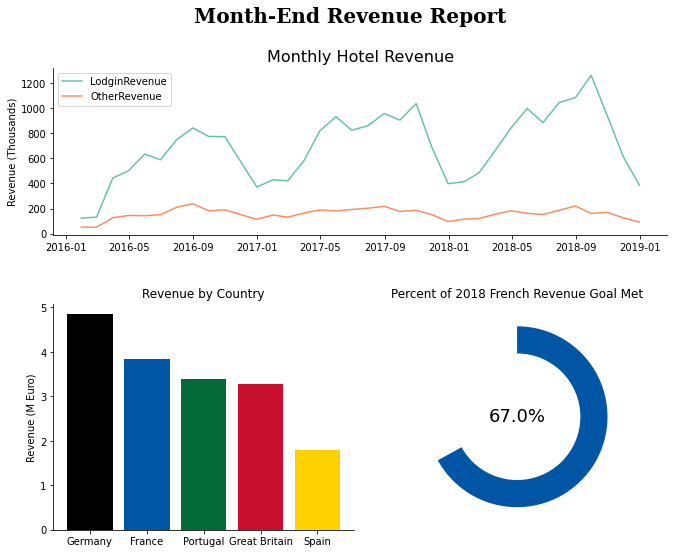

In [57]:
from matplotlib.gridspec import GridSpec
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

fig = plt.figure(figsize=(11, 8.5))

gs = GridSpec(nrows=8, ncols = 8)

fig.suptitle('Month-End Revenue Report',
             fontsize = 20,
             fontweight = 'bold',
             fontfamily = 'serif')

ax1 = fig.add_subplot(gs[0:3, :])

ax1.plot(
    monthly_revenue_gs.index,
    monthly_revenue_gs['LodgingRevenue'] / 1000,
    label = 'LodginRevenue'
)

ax1.plot(
    monthly_revenue_gs.index,
    monthly_revenue_gs['OtherRevenue'] / 1000,
    label = 'OtherRevenue'
)

ax1.set_title('Monthly Hotel Revenue', fontsize = 16)
ax1.set_ylabel('Revenue (Thousands)')

ax1.legend(loc = 'upper left')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar chart
ax2 = fig.add_subplot(gs[4:, :4])

colors = ['black', '#0055a4', "#046a38", '#c8102e', "#ffd100"]
ax2.bar(
    x = rev_by_country.index,
    height = rev_by_country['total_revenue'] / 1000_000,
    color = colors
)


ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany', 'France', 'Portugal', 'Great Britain', 'Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



# Pie Chart

ax3 = fig.add_subplot(gs[4:, 4:])
pie_list = [.33, .67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    # autopct='%.0f%%',
    pctdistance=.85,
    colors = ['white', '#0055a4']
)

hole = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()

# Add circle in Pie chart
fig.gca().add_artist(hole)
plt.text(
    0, 0,
    f'{pie_list[1] * 100}%',
    ha = 'center',
    va = 'center',
    fontsize = 18
)

ax3.set_title('Percent of 2018 French Revenue Goal Met', fontsize = 12)

plt.show()

# Assignment stylesheets

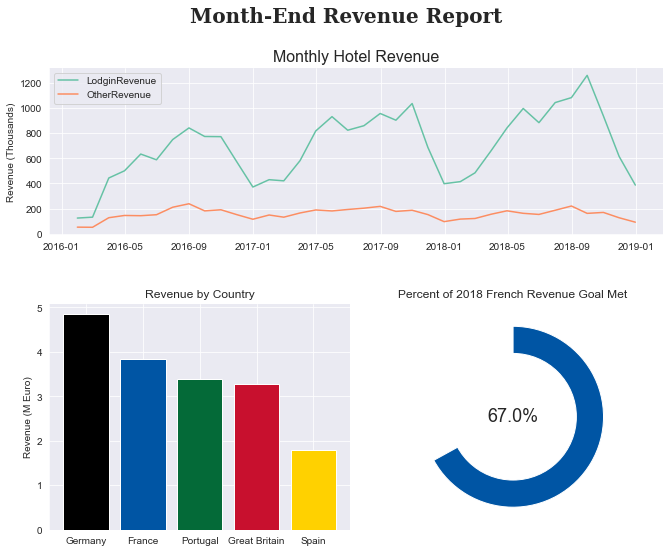

In [59]:
from matplotlib.gridspec import GridSpec
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure(figsize=(11, 8.5))

gs = GridSpec(nrows=8, ncols = 8)

fig.suptitle('Month-End Revenue Report',
             fontsize = 20,
             fontweight = 'bold',
             fontfamily = 'serif')

ax1 = fig.add_subplot(gs[0:3, :])

ax1.plot(
    monthly_revenue_gs.index,
    monthly_revenue_gs['LodgingRevenue'] / 1000,
    label = 'LodginRevenue'
)

ax1.plot(
    monthly_revenue_gs.index,
    monthly_revenue_gs['OtherRevenue'] / 1000,
    label = 'OtherRevenue'
)

ax1.set_title('Monthly Hotel Revenue', fontsize = 16)
ax1.set_ylabel('Revenue (Thousands)')

ax1.legend(loc = 'upper left')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar chart
ax2 = fig.add_subplot(gs[4:, :4])

colors = ['black', '#0055a4', "#046a38", '#c8102e', "#ffd100"]
ax2.bar(
    x = rev_by_country.index,
    height = rev_by_country['total_revenue'] / 1000_000,
    color = colors
)


ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany', 'France', 'Portugal', 'Great Britain', 'Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



# Pie Chart

ax3 = fig.add_subplot(gs[4:, 4:])
pie_list = [.33, .67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    # autopct='%.0f%%',
    pctdistance=.85,
    colors = ['white', '#0055a4']
)

hole = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()

# Add circle in Pie chart
fig.gca().add_artist(hole)
plt.text(
    0, 0,
    f'{pie_list[1] * 100}%',
    ha = 'center',
    va = 'center',
    fontsize = 18
)

ax3.set_title('Percent of 2018 French Revenue Goal Met', fontsize = 12)

plt.show()